# 1 pytorch的概念

## 1.1 tensor张量

### 1.1.1 PyTorch的tensor与NumPy array相互转换
PyTorch的很多操作和numpy都是类似的，但是因为其能够在 GPU 上运行，所以比 NumPy 快很多。

In [23]:
import torch
import numpy as np
# 创建一个 numpy ndarray
numpy_tensor = np.random.randn(10, 20)
x = torch.randn(10, 20)

#### 1.1.1.1 ndarray==>tensor
- torch.Tensor 强制类型转换
- torch.from_numpy创建函数

In [24]:
pytorch_tensor1 = torch.Tensor(numpy_tensor)
pytorch_tensor2 = torch.from_numpy(numpy_tensor)
print(type(pytorch_tensor2))
print(type(pytorch_tensor1))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


#### 1.1.1.2 tensor==>ndarray

In [25]:
# 如果 pytorch tensor 在 cpu 上
numpy_array = pytorch_tensor1.numpy()

# 如果 pytorch tensor 在 gpu 上
numpy_array = pytorch_tensor1.cpu().numpy()

### 1.1.2 PyTorch Tensor 使用 GPU 加速

In [ ]:
# 第一种方式是定义 cuda 数据类型
dtype = torch.cuda.FloatTensor # 定义默认 GPU 的 数据类型
gpu_tensor = torch.randn(10, 20).type(dtype)

# 第二种方式更简单，推荐使用
gpu_tensor = torch.randn(10, 20).cuda() # 将 tensor 放在GPU 上

### 1.1.3 tensor的属性

In [ ]:
# 可以通过下面两种方式得到 tensor 的大小
print(pytorch_tensor1.shape)
print(pytorch_tensor1.size())

In [ ]:
# 得到 tensor 的数据类型
print(pytorch_tensor1.type())

In [ ]:
## 维度
print(pytorch_tensor1.dim())

In [ ]:
# 得到 tensor 的所有元素个数
print(pytorch_tensor1.numel())

### 1.1.4 tensor的数据类型变换

In [ ]:
x = torch.randn(3, 2)
print(x)
x = x.type(torch.DoubleTensor)
print(x)
x_array = x.numpy()
print(x_array.dtype)

## 1.2 tensor的操作

### 1.2.1 squeeze和unsqueeze操作: 降维升维

In [ ]:
print(torch.ones(2, 2))
#torch.Size([2, 2])
print(torch.ones(2, 2).size())
x = torch.ones(2, 2).unsqueeze(0)
torch.Size([1, 2, 2])
print(x) 
print(x.size())

# 将 tensor 中所有的一维全部都去掉
x = x.squeeze() 
print(x)
print(x.shape)

### 1.2.2 数值类型转换

In [ ]:
# 将其转化为整形
x = x.long()
# x = x.type(torch.LongTensor)
print(x.type())

### 1.2.3 使用permute和transpose进行维度交换

In [ ]:
x = torch.randn(3, 4, 5)
print(x.shape)

# 使用permute和transpose进行维度交换
x = x.permute(1, 0, 2) # permute 可以重新排列 tensor 的维度
print(x.shape)

x = x.transpose(0, 2)  # transpose 交换 tensor 中的两个维度
print(x.shape)

### 1.2.4 使用 view 对 tensor 进行 reshape

In [ ]:
x = torch.randn(3, 4, 5)
print(x.shape)
## 拉伸
x = x.view(-1, 5) # -1 表示任意的大小，5 表示第二维变成 5
print(x.shape)
x = x.view(3, 20) # 重新 reshape 成 (3, 20) 的大小
print(x.shape)

### 1.2.5 tensor的运算:相加

In [ ]:
x = torch.zeros(3, 4)
y = torch.ones(3, 4)
# 两个 tensor 求和
z = x + y
print(z)
z = torch.add(x, y)
print(z)

### 1.2.6 tensor的inplace操作
pytorch中大多数的操作都支持 inplace 操作，也就是可以直接对 tensor 进行操作而不需要另外开辟内存空间。方式非常简单，一般都是在操作的符号后面加_

## 1.3 变量

- from torch.autograd import Variable
- Variable 是对 tensor 的封装，操作和 tensor 是一样的，
- 但是每个 Variabel都有三个属性，Variable 中的`.data`，梯度`.grad`以及这个 Variable 是通过什么方式得到的`.grad_fn`。

### 1.3.1 变量的梯度

In [ ]:
# 通过下面这种方式导入 Variable
from torch.autograd import Variable
x_tensor = torch.randn(10, 5)
y_tensor = torch.randn(10, 5)

# 将 tensor 变成 Variable
# 默认 Variable 是不需要求梯度的，所以我们用这个方式申明需要对其进行求梯度
x = Variable(x_tensor, requires_grad=True) 

# 2 梯度下降法Gradient Descent (GD)介绍

## 2.1 梯度下降法简介

### 2.1.1 梯度

比如一个一个函数$f(x, y)$，那么 $f$ 的梯度就是 

$$
(\frac{\partial f}{\partial x},\ \frac{\partial f}{\partial y})
$$

可以称为 $grad f(x, y)$ 或者 $\nabla f(x, y)$。具体某一点 $(x_0,\ y_0)$ 的梯度就是 $\nabla f(x_0,\ y_0)$。

### 2.1.2 学习率

- 来沿着梯度的反方向，我们能够更快地找到函数的最小值点
- 我们需要每次往下走的那一步的长度，这个长度称为学习率，用  𝜂  表示
- 学习率太小会导致下降非常缓慢
- 学习率太大又会导致跳动非常明显

### 2.1.3 更新梯度公式

$$ 
w_{i+1}= w_{i} - \eta \frac{\partial f(w)}{\partial w}
$$
- 1 $ w_{i+1}$是第t+1步的位置,<br>
- 2 $\frac{\partial f(w)}{\partial w} $ 是微分,<br>
- 3 $\eta$是步长

## 2.2 梯队下降的缺点

- 鞍点
    - 一个不是局部最小值的驻点（一阶导数为0的点）称为鞍点。
    - 数学含义是： 目标函数在此点上的梯度（一阶导数）值为 0， 但从改点出发的一个方向是函数的极大值点，而在另一个方向是函数的极小值点

鞍点的例子 $z = x^{2} - y^{2}$, 函数图形为

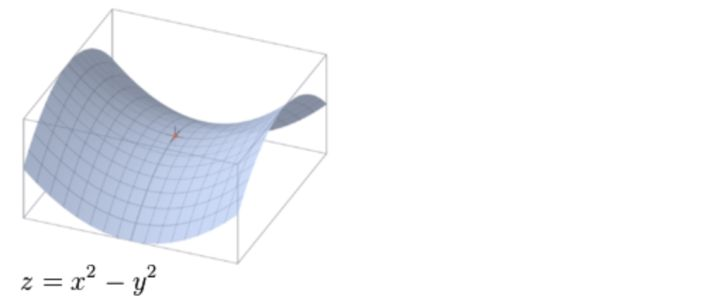

$z = x^{4} - y^{3} $ 的(0,0)也是鞍点

## 2.3 Stochastic Gradient Descent (SGD) 算法

### 2.3.1 SGD的理解
- 用一张图来表示，其实SGD就像是喝醉了酒的GD，它依稀认得路，最后也能自己走回家，但是走得歪歪扭扭
- 虽然包含一定的随机性，但是从期望上来看，它是等于正确的导数的．

### 2.3.2 SGD的公式
$$
    w_{i+1}= w_{i} - \eta J
$$
- $ w_{i+1}$是第t+1步的位置,$J$ 是随机微分, $\eta$是步长
- $J$的期望满足梯队函数
$$
E[J]= \frac{\partial f(w)}{\partial w}
$$

# 3 pytorch函数实现梯度下降法: 线性回归

## 3.1 线性回归的参数的误差更新公式

### 3.1.1 线性回归的公式:
$$
\hat{y}_i = w x_i + b
$$
$\hat{y}_i$ 是我们预测的结果，希望通过 $\hat{y}_i$ 来拟合目标 $y_i$，通俗来讲就是找到这个函数拟合 $y_i$ 使得误差最小，即最小化损失函数定义为

$$
J=\frac{1}{n} \sum_{i=1}^n(\hat{y}_i - y_i)^2
$$
### 3.1.2 梯队下降
   $J$对$w,b$求偏导, 微分得到 ${w}_{i+1}$ 和 ${w}_i$的关系,${b}_{i+1}$ 和 ${b}_i$的关系如下

$$
w := w - \eta \frac{\partial f(w,\ b)}{\partial w} \\
b := b - \eta \frac{\partial f(w,\ b)}{\partial b}
$$
通过不断地迭代更新，最终我们能够找到一组最优的 w 和 b，这就是梯度下降法的原理。
### 3.1.3 线性回归的梯度下降
w 和 b 的梯度分别是

$$
\frac{\partial J}{\partial w} = \frac{2}{n} \sum_{i=1}^n x_i(w x_i + b - y_i) \\
\frac{\partial J}{\partial b} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i)
$$


## 3.2 代码实现

In [27]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline
# 定义随机因子
torch.manual_seed(2019)

### 3.2.1 创建张量tensor(测试样本数据)
tensor的使用接口和 numpy 非常相似

In [28]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
# 转换成 Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

### 3.2.2  创建变量Variable
- from torch.autograd import Variable
- Variable 是对 tensor 的封装，操作和 tensor 是一样的，
- 但是每个 Variabel都有三个属性，Variable 中的.data，梯度.grad以及这个 Variable 是通过什么方式得到的.grad_fn

In [29]:
# 定义参数 w 和 b
w = Variable(torch.randn(1), requires_grad=True) # 随机初始化
b = Variable(torch.zeros(1), requires_grad=True) # 使用 0 进行初始化
x_train = Variable(x_train)
y_train = Variable(y_train)
print(w)
print(b)

tensor([-0.1187], requires_grad=True)
tensor([0.], requires_grad=True)


### 3.2.3 构建计算图: 拟合模型,损失函数

In [30]:
def linear_model(x):
    return x * w + b

In [31]:
# 计算误差
def get_loss(y_, y):
    return torch.mean((y_ - y_train) ** 2)

### 3.2.4 训练模型

#### 3.2.4.1 训练模型-查看初始化参数的模型

- 目的:
    * 根据初始超参数, 计算第一次估计的y值
    * 根据第一次估算的值, 计算误差
- 画图
    * tensor的data属性
    * plt的输入为numpy类型

In [33]:
y_ = linear_model(x_train)

In [34]:
loss = get_loss(y_, y_train)
# 打印一下看看 loss 的大小
print(loss)

tensor(10.2335, grad_fn=<MeanBackward1>)


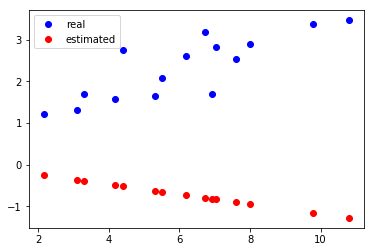

In [35]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

#### 3.2.4.2 训练模型-第一次通过损失函数的梯队来优化参数,优化模型

**注:** 第一次不需要梯度归零 grad.zero_()
否则None,'NoneType' object has no attribute 'zero_'


In [37]:
## 计算w,b梯队微分
# 将 tensor 变成 Variable 
# 默认 Variable 是不需要求梯度的，所以我们用这个方式申明需要对其进行求梯度
# 根据tensor的gent_loss损失函数计算图中, x,y已知的损失值tensor对象Loss
## 自动对tensor对象求求参数的偏导函数,并且计算梯队微分
#x = Variable(x_tensor, requires_grad=True) 
#y = Variable(y_tensor, requires_grad=True)
print(loss)
loss.backward()
print(w.grad)
print(b.grad)

tensor(10.2335, grad_fn=<MeanBackward1>)
None
tensor([-41.1289])
tensor([-6.0890])


#### 3.2.4.3 根据学习率和计算的w,b的梯队来更新w,b的参数

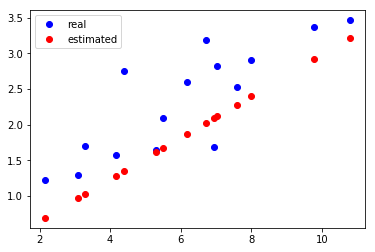

In [39]:
# 梯队下降,减去学习率*梯队微分, 更新一次参数
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

#### 3.2.4.4 迭代30次,训练模型的参数

In [40]:
for e in range(31): # 进行 30 次更新
    y_ = linear_model(x_train) ## 计算拟合的Y值: tensor
    loss = get_loss(y_, y_train) ## 计算损失值: tensor
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    # 自动求导,计算梯队w.grad.data,b.grad.data
    loss.backward()
    # 使用梯队更新参数
    w.data = w.data - 1e-2 * w.grad.data # 更新 w
    b.data = b.data - 1e-2 * b.grad.data # 更新 b 
    if e%10==0:
        print('epoch: {}, loss: {}'.format(e, loss.item()))

epoch: 0, loss: 0.4142104387283325
epoch: 10, loss: 0.2260516732931137
epoch: 20, loss: 0.2231873869895935
epoch: 30, loss: 0.2204667031764984


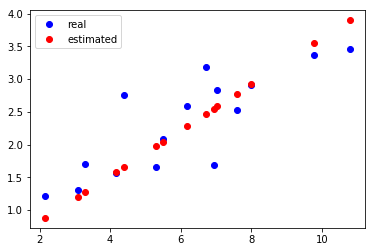

In [41]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

# 4 pytorch函数实现实现SGD: mnist手写体识别

## 4.1 加载数据

In [1]:
import numpy as np
import torch
from torchvision.datasets import MNIST # 导入 pytorch 内置的 mnist 数据
from torch.utils.data import DataLoader
from torch import nn
from torch.autograd import Variable
import time
import matplotlib.pyplot as plt
%matplotlib inline

### 4.1.1 数据转换规范

In [2]:
def transform_mnist(x):
    x = np.array(x, dtype='float32') / 255 # 将数据变到 0 ~ 1 之间
    x = (x - 0.5) / 0.5 # 标准化，这个技巧之后会讲到
    x = x.reshape((-1,)) # 拉平
    x = torch.from_numpy(x)
    return x

### 4.1.2 从下载的文件中加载数据

In [3]:
def download_mnist_data(batch_size):
    # transform 函数式编程, 对数据的变换 train指定测试训练
    # 载入数据集，申明定义的数据变换
    # 定义train=True or false
    train_set = MNIST(r'E:\ai\ai_lab\ai_case\ai_data\pytorch\MNIST\data', train=True, transform=transform_mnist, download=False) 
    test_set = MNIST(r'E:\ai\ai_lab\ai_case\ai_data\pytorch\MNIST\data', train=False, transform=transform_mnist, download=False)
    # 加载数据,打乱数据
    ## DataLoader: 批量取多少图片
    train_data = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    return train_data

## 4.2 定义网络结构,定义损失函数,定义SDG函数

### 4.2.1 使用 Sequential 定义 3 层神经网络

In [5]:
# 最后一层10个输出
net = nn.Sequential(
        nn.Linear(784, 200),
        nn.ReLU(),
        nn.Linear(200, 10),
)

### 4.2.2 定义损失函数

In [9]:
# 交叉熵函数
criterion = nn.CrossEntropyLoss()

### 4.2.3 定义SDG函数

In [10]:
def sgd_update(parameters, lr):
    for param in parameters:
        param.data = param.data - lr * param.grad.data

## 4.3 训练网络

### 4.3.1 定义网络训练的函数过程

**注1: 梯队归零的方法**
- 直接把模型的参数梯度设成0:
    * model.zero_grad()
    * optimizer.zero_grad() 
    * 当optimizer=optim.Optimizer(model.parameters())时，两者等效
- 如果想要把某一Variable的梯度置为0
    * Variable.grad.data.zero_()

In [11]:
def train_net(net,train_data,lr):
    train_losses=[]
    train_loss = 0
    losses_idx = 0
    ### batch_size影响im,label的大小
    ### batch_size影响迭代次数.
    for im, label in train_data:
        # 定义变量:
        im = Variable(im)
        label = Variable(label)
        # 前向传播,传入输入tensor,获得输出tensor
        out = net(im)
        # 计算损失tensor: 根据前向传播的预测值和真是标签
        loss = criterion(out, label)
        # 将网络的所有参数的梯度属性置为零
        net.zero_grad()
        # 默认 Variable 是不需要求梯度的， requires_grad=True 这个方式申明需要对其进行求梯度
        # 损失值tensor的对网络参数的偏导
        loss.backward()
        ## 对模型参数更新,
        ## 属性 net.parameters得到所有参数
        sgd_update(net.parameters(),lr) # 使用lr的学习率
        # 记录误差
        train_loss += loss.item()
        if losses_idx % 10 == 0:
            train_losses.append(loss.item())
        losses_idx += 1
    return (train_losses,train_loss,losses_idx)

### 4.3.2 定义主函数

In [12]:
def train(net,train_data,lr,batch_size):
    start = time.time() # 记时开始
    # 训练网络,记录损失值
    (train_losses,train_loss,losses_idx)=train_net(net,train_data,lr)
    end = time.time() # 计时结束
    print('epoch: 1, Train Loss: {:.6f}'.format(train_loss / len(train_data)))
    print('使用时间: {:.5f} s'.format(end - start))
    x_axis = np.linspace(0, 5, len(train_losses), endpoint=True)
    plt.semilogy(x_axis, train_losses, label='batch_size=%d'%batch_size)
    plt.legend(loc='best')

### 4.3.3 开始训练网络

定义学习率和批量规模

In [13]:
batch_size=100
lr=1e-2

下载数据, 使用torch.utils.data.DataLoader方法批量加载数据

In [14]:
train_data=download_mnist_data(batch_size=batch_size)

训练数据, 根据批量规模, 训练所有的数据

epoch: 1, Train Loss: 0.905261
使用时间: 7.80006 s


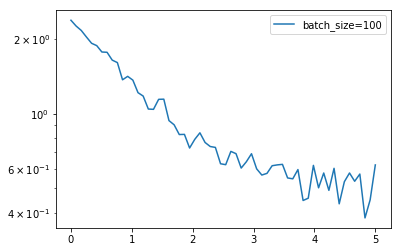

In [16]:
train(net,train_data,lr=1e-2,batch_size=100)